# Reading the parquet file

## importing the libraries and reading the Parquet file

In [1]:
import gc
import polars as pl
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

train = pl.read_parquet('../data/train.parquet')
test = pl.read_parquet('../data/test.parquet')

In [2]:
train.head()

session,aid,ts,type
i32,i32,i32,u8
0,1517085,1659304800,0
0,1563459,1659304904,0
0,1309446,1659367439,0
0,16246,1659367719,0
0,1781822,1659367871,0


In [3]:
test.head()

session,aid,ts,type
i32,i32,i32,u8
12899779,59625,1661724000,0
12899780,1142000,1661724000,0
12899780,582732,1661724058,0
12899780,973453,1661724109,0
12899780,736515,1661724136,0


In [4]:
train['type'].unique()

type
u8
0
1
2


In [5]:
train['aid'].n_unique()

1855603

In [6]:
train['session'].n_unique()

12899779

In [7]:
train.describe()

describe,session,aid,ts,type
str,f64,f64,f64,f64
"""count""",2.16716096e8,2.16716096e8,2.16716096e8,2.16716096e8
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",4.7028e6,928805.229105,1.6605e9,0.125021
"""std""",3.6650e6,536691.747782,696145.02771,0.395534
"""min""",0.0,0.0,1.6593e9,0.0
"""max""",1.2899778e7,1.855602e6,1.6617e9,2.0
"""median""",3.915777e6,928109.0,1.6605e9,0.0


In [8]:
df = train

In [9]:
df

session,aid,ts,type
i32,i32,i32,u8
0,1517085,1659304800,0
0,1563459,1659304904,0
0,1309446,1659367439,0
0,16246,1659367719,0
0,1781822,1659367871,0
0,1152674,1659367885,0
0,1649869,1659369893,1
0,461689,1659369898,1
0,305831,1659370027,2


In [10]:
#sns.histplot(data=df, x="type")

In [11]:
q = (
    df.lazy()
    .groupby("session")
    .agg(
        [
            (pl.col("type") == 0).sum().alias("click"),
            (pl.col("type") == 1).sum().alias("cart"),
            (pl.col("type") == 2).sum().alias("order"),
        ]
    )
    .sort("click", reverse=False)
    
)

df_type = q.collect()

In [12]:
df_type.shape

(12899779, 4)

In [13]:
df_type.head(10)

session,click,cart,order
i32,u32,u32,u32
10485760,2,0,0
2097152,2,1,0
8523908,2,1,0
6426756,2,0,0
4464904,2,0,0
6562056,2,0,0
8929808,2,0,0
2638352,2,0,0
9335708,2,0,0


In [14]:
multi_filter_df = df_type.filter((pl.col("click") > 2) & (pl.col("cart") < 1 ) & (pl.col("order") < 1 ))

In [15]:
multi_filter_df 

session,click,cart,order
i32,u32,u32,u32
8659208,3,0,0
10756360,3,0,0
541200,3,0,0
2773652,3,0,0
6967956,3,0,0
9200408,3,0,0
5276704,3,0,0
9606308,3,0,0
11703460,3,0,0


In [16]:
multi_filter_df_hole = df_type.filter(pl.col("click") > 2)

<AxesSubplot:xlabel='click', ylabel='order'>

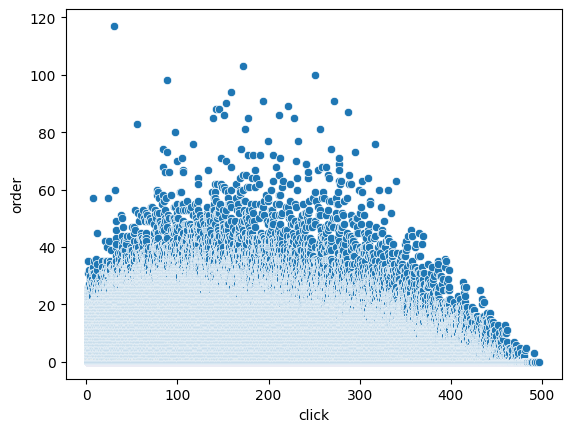

In [17]:
sns.scatterplot(data = df_type, x="click", y="order")

<AxesSubplot:xlabel='click', ylabel='order'>

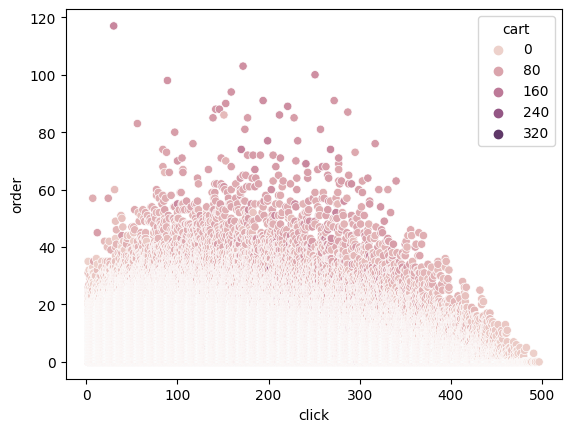

In [18]:
sns.scatterplot(data = df_type, x="click", y="order", hue="cart")

In [19]:
plt.savefig('Click_Order.png')

<Figure size 640x480 with 0 Axes>

<AxesSubplot:xlabel='cart', ylabel='order'>

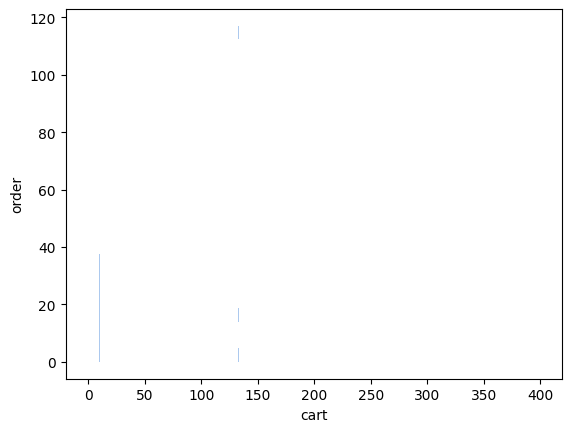

In [20]:
sns.histplot(data=df_type, x="cart", y="order")

**Now let's compare, how often every type of event occured**

In [21]:
# events_types = (df.lazy().groupby('type').agg([pl.count()]).sort("type", reverse=True)).collect()
# fig, ax = plt.subplots(figsize=(20, 14))
# sns.histplot(events_types.select('count'),stat='percent', kde=False, palette="rocket")
# ax.set_title('Event types frequency', fontsize=12)
# ax.set_ylabel('Frequency', fontsize=12)
# ax.set_xlabel('Types', fontsize=12)
# plt.show()

In [22]:
events_types = (df.lazy().groupby('type').agg([pl.count()]).sort("type", reverse=False)).collect()

In [23]:
events_types

type,count
u8,u32
0,194720954
1,16896191
2,5098951


In [144]:
#function to plot a piechart
def pie_Chart(values, labels, title, explode):
    colors = sns.color_palette('pastel')[0:5]
    explode = explode
    plt.pie(values ,explode=explode,counterclock=False, shadow=False, autopct='%1.1f%%',colors=colors)
    plt.title(title, fontsize=12)
    plt.legend(labels, loc='center left', bbox_to_anchor=(1.5, 0.5))
    plt.savefig('demo.png', transparent=True)
    plt.show()  

In [25]:
Values = []
Lang = len(events_types.select('count').to_numpy().tolist())
for i in range(Lang):
    Values.append(events_types.select('count').to_numpy().tolist()[i][0])

In [26]:
labels = ['Clicks', 'Carts', 'Orders']

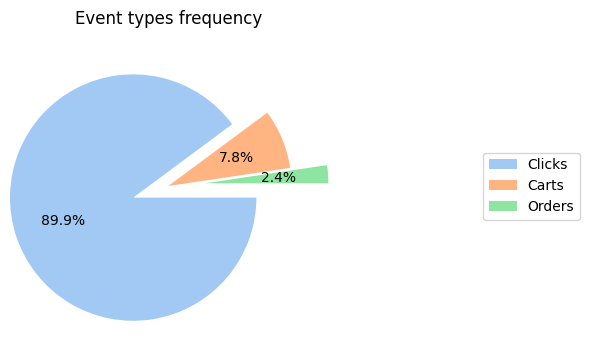

In [145]:
#plot piechart of Event types frequency
plt.figure(figsize = [5, 4]);
title = 'Event types frequency'
explode = (0.3, 0,0.3)
pie_Chart(Values, labels, title, explode);
# Safe the Data
#plt.savefig('distribution_different_types.png')

# plt.show();


In [160]:
Values

[194720954, 16896191, 5098951]

In [161]:
Values = [(x / sum(Values))*100 for x in Values]

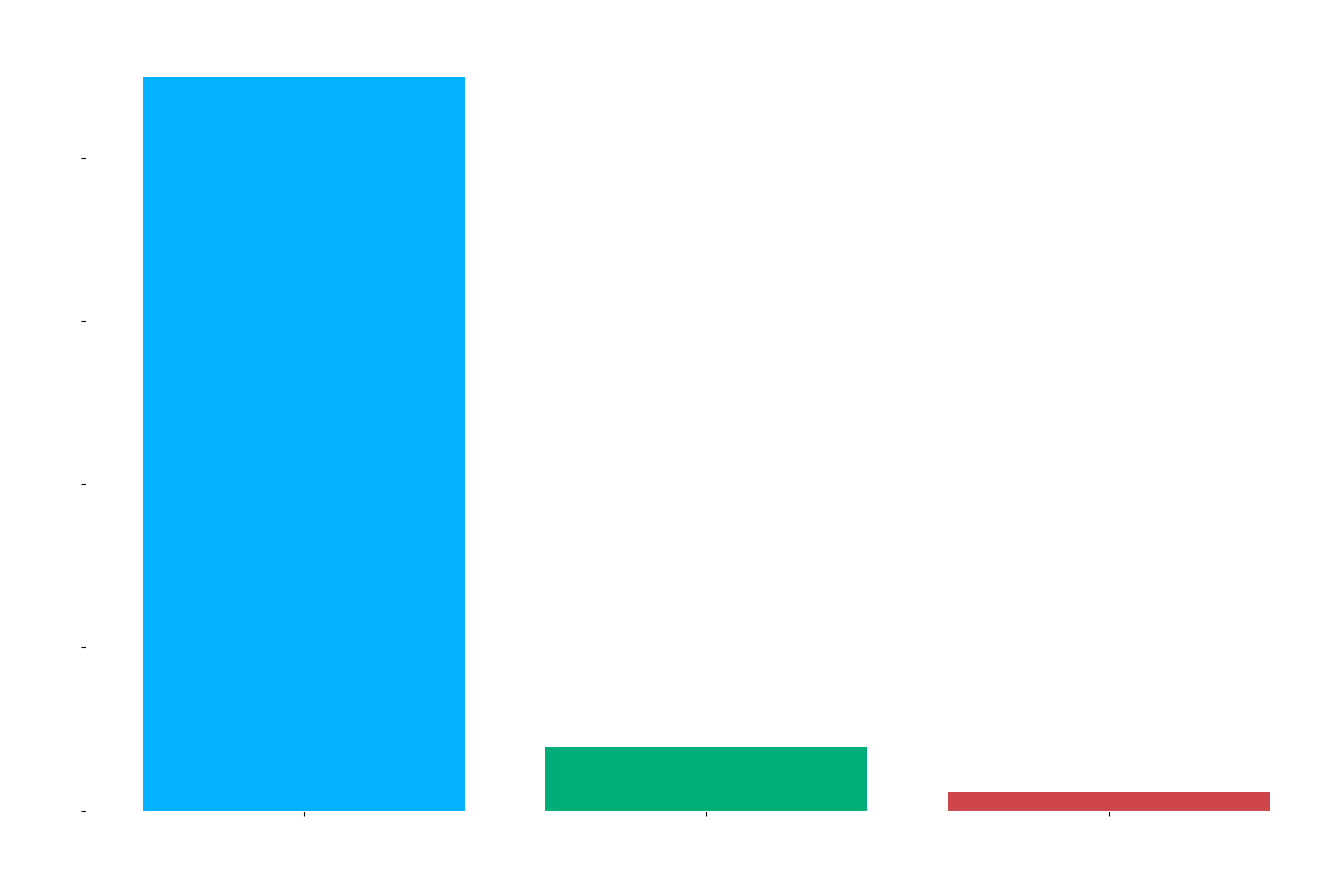

In [248]:
# Plot how the Event Types distrebuted 
fig, ax = plt.subplots(figsize=(16, 10))
#sns.barplot(x=labels, y=Values, ax=ax, color = ["#04b2ff","#04b2ff","#04b2ff"])
ax.bar(labels, Values, color = ["#04b2ff","#00ad79","#ce464a"],align ='center')
#ax.set_title('Event types frequency', fontsize=12)
ax.set_title('Distribution of different Product-ids in Procent', fontsize=22,color = "white")
ax.set_ylabel('Frequency', fontsize=22,color = "white")
ax.set_xlabel('Actions', fontsize=22,color = "white")
ax.tick_params(labelcolor='white',labelsize=18)
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('w')
plt.savefig('distribution_different_types.png', transparent=True)
plt.show();
# ax.set_facecolor('darkred')
# ax.set_facecolor((1.0, 0.47, 0.42))
# plt.show()

In [147]:
# x = np.linspace(0,6,31)
# y = np.exp(-0.5*x) * np.sin(x)
# plt.plot(x, y, 'bo-')
# plt.savefig('demo.png', transparent=True)

In [30]:
# from_ = [0, 1, 2]
# to_ = ['click', 'cart', 'order']

In [31]:
# events_types = events_types.with_column(
#     pl.when(pl.col("type") == from_[0])
#     .then(to_[0])
#     .when(pl.col("type") == from_[1])
#     .then(to_[1])
#     .when(pl.col("type") == from_[2])
#     .then(to_[2])
#     .otherwise(pl.col("type")).alias("Type_str")
# )

In [32]:
# events_types = events_types.with_column(pl.col("Type_str").cast(pl.Categorical))

**Let's Visualize the Duration of each Session**

In [33]:
def count_seconds(x):
    max_value = int(x.max())
    min_value = int(x.min())
    #session_time = timedelta(microseconds=max_value - min_value)
    session_time = timedelta(seconds=max_value - min_value)
    return session_time.total_seconds() / 60 

/Users/abderrahmen/Neue_fische/Capstone-OTTO-Multi-Objective-Recommender-System/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


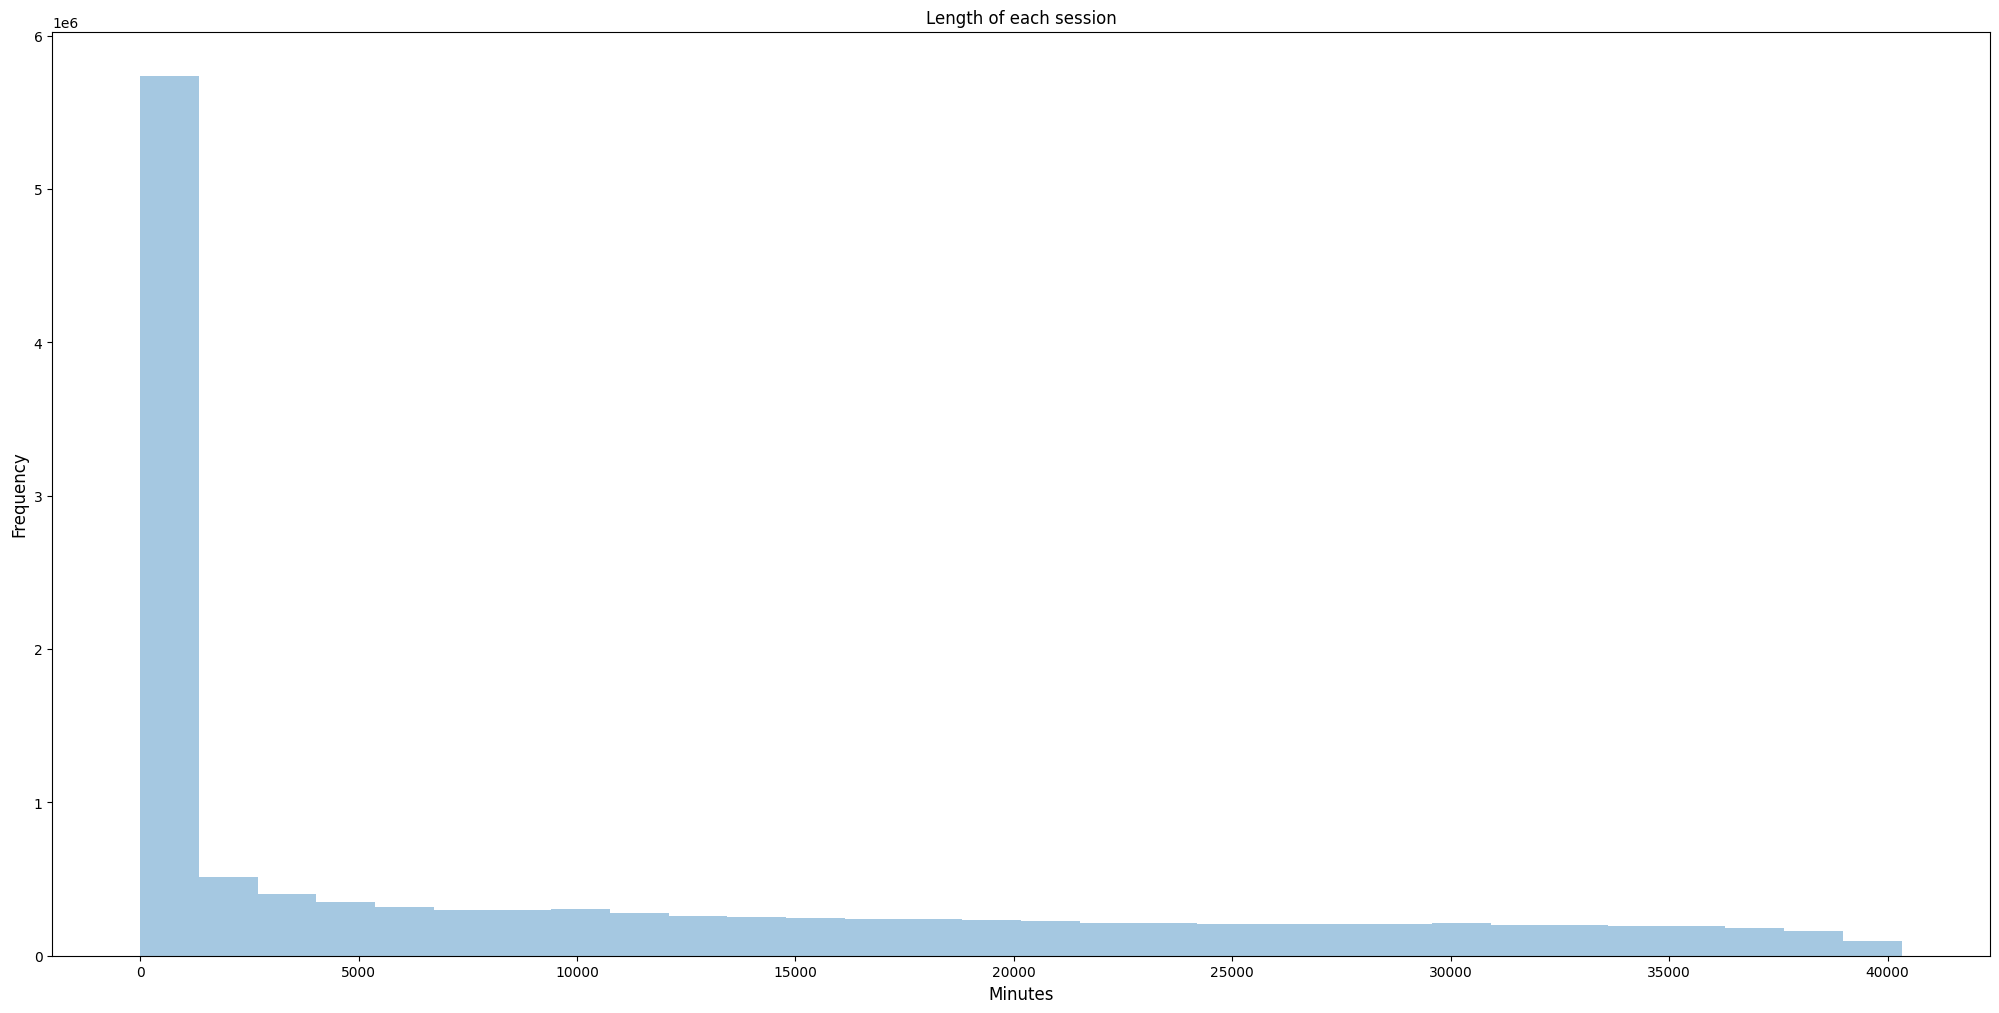

In [34]:
# distrubution of Session regarding Duration
time_counts = (df.lazy().groupby('session').agg([pl.col("ts").apply(count_seconds)]).sort("session", reverse=True)).collect()
fig, ax = plt.subplots(figsize=(25,12))
sns.distplot(x=time_counts.select('ts'), ax=ax, bins=30, kde=False)
ax.set_title('Length of each session', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Minutes', fontsize=12)
plt.show()

In [35]:
time_counts.describe()

describe,session,ts
str,f64,f64
"""count""",1.2899779e7,1.2899779e7
"""null_count""",0.0,0.0
"""mean""",6.449889e6,9875.644206
"""std""",3.7238e6,12149.109353
"""min""",0.0,0.0
"""max""",1.2899778e7,40319.85
"""median""",6.449889e6,3093.633333


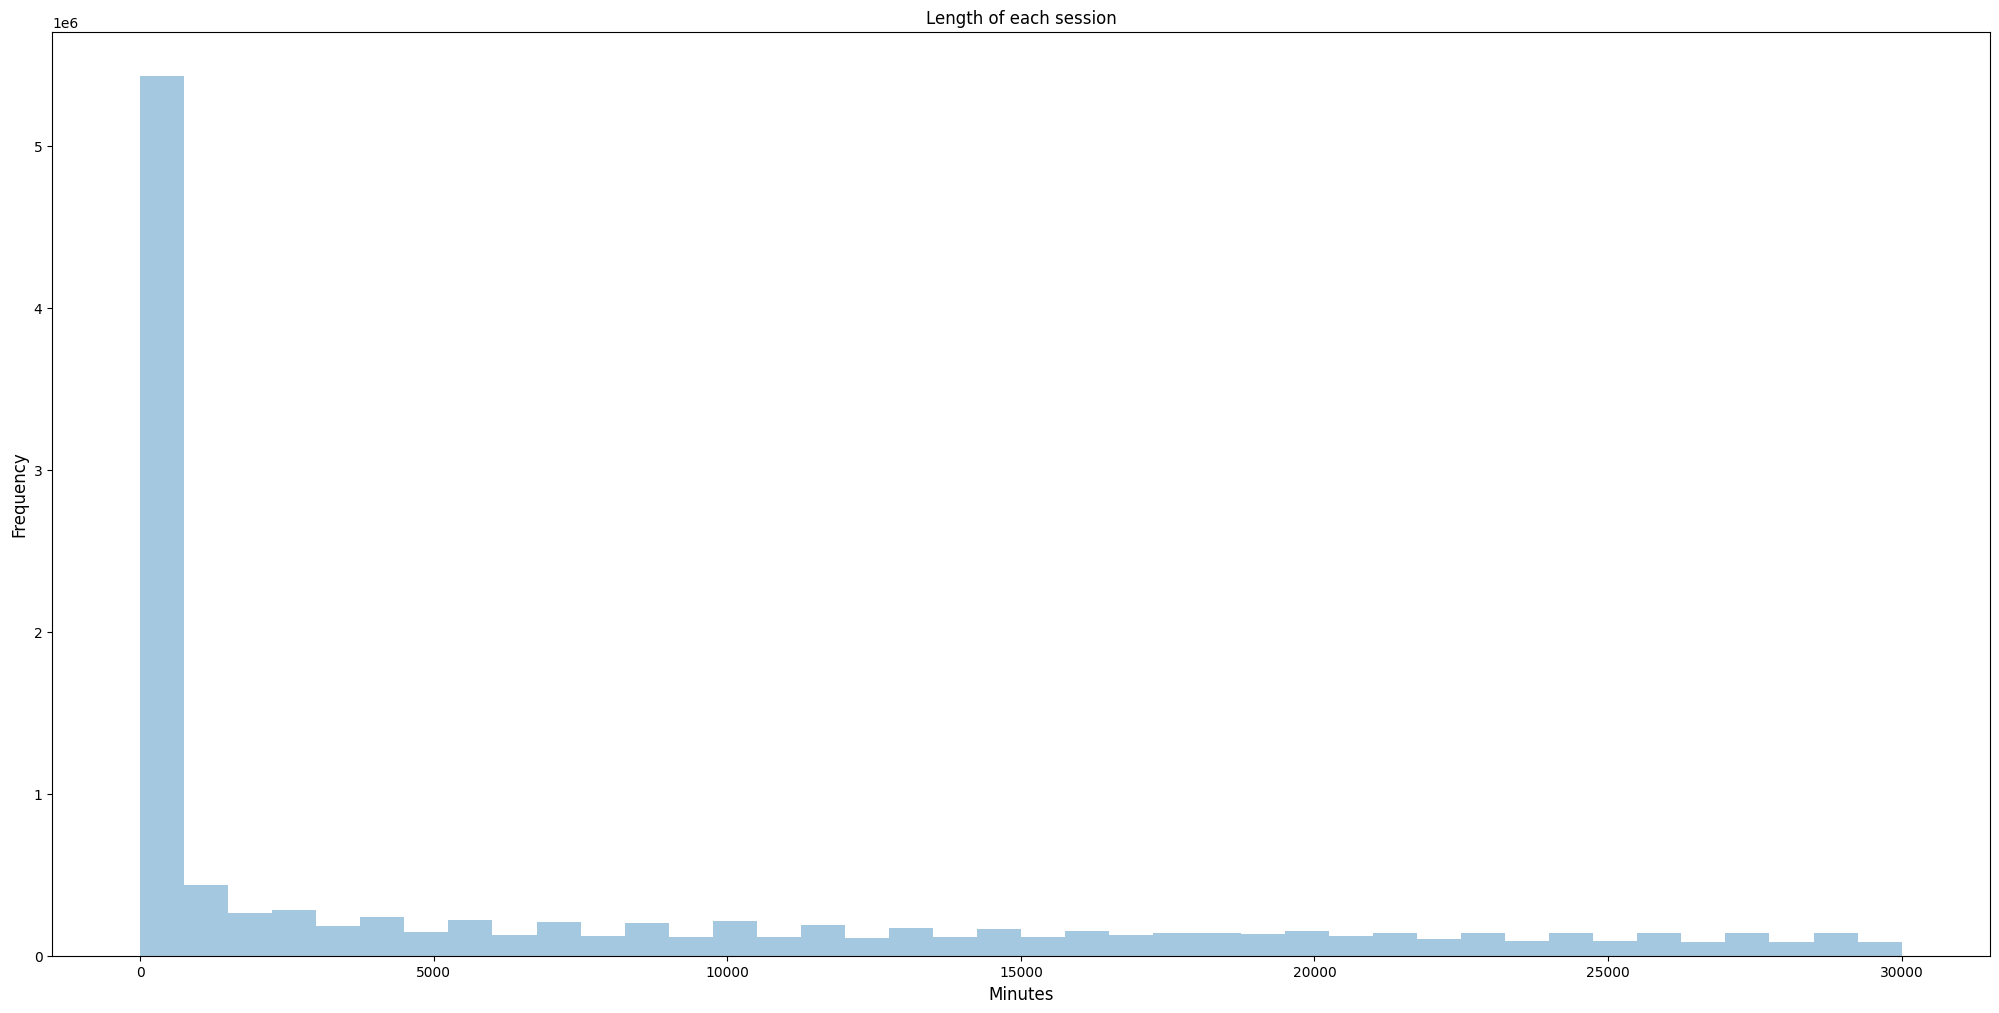

In [36]:
time_counts_picked = time_counts.filter((pl.col("ts") <= 30000))
fig, ax = plt.subplots(figsize=(25,12))
sns.distplot(x=time_counts_picked.select('ts'), ax=ax, bins=40, kde=False)
ax.set_title('Length of each session', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Minutes', fontsize=12)
plt.show()

In [37]:
time_counts.filter((pl.col("ts") <= 6500)).shape[0]/time_counts.shape[0]

0.5655639526847708

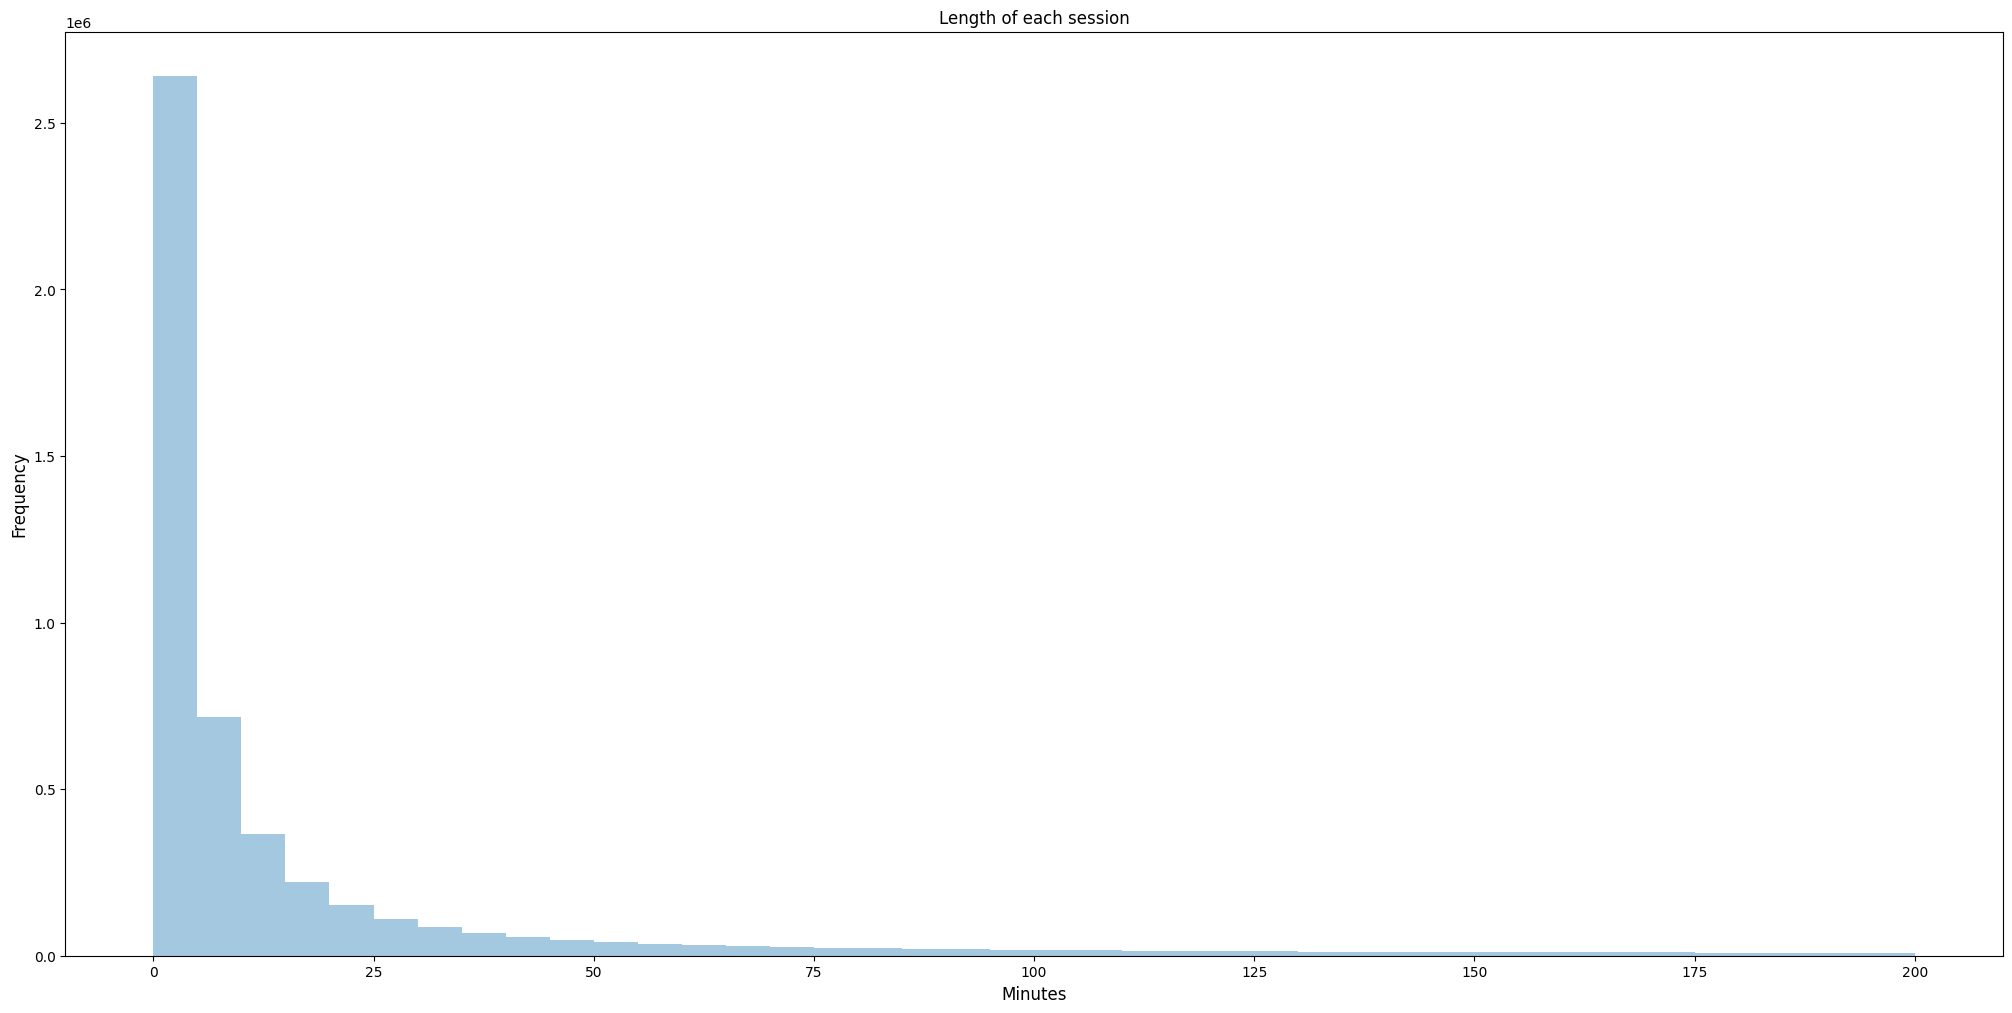

In [38]:
time_counts_picked2 = time_counts.filter((pl.col("ts") <= 200))
fig, ax = plt.subplots(figsize=(25,12))
sns.distplot(x=time_counts_picked2.select('ts'), ax=ax, bins=40, kde=False)
ax.set_title('Length of each session', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Minutes', fontsize=12)
plt.show()

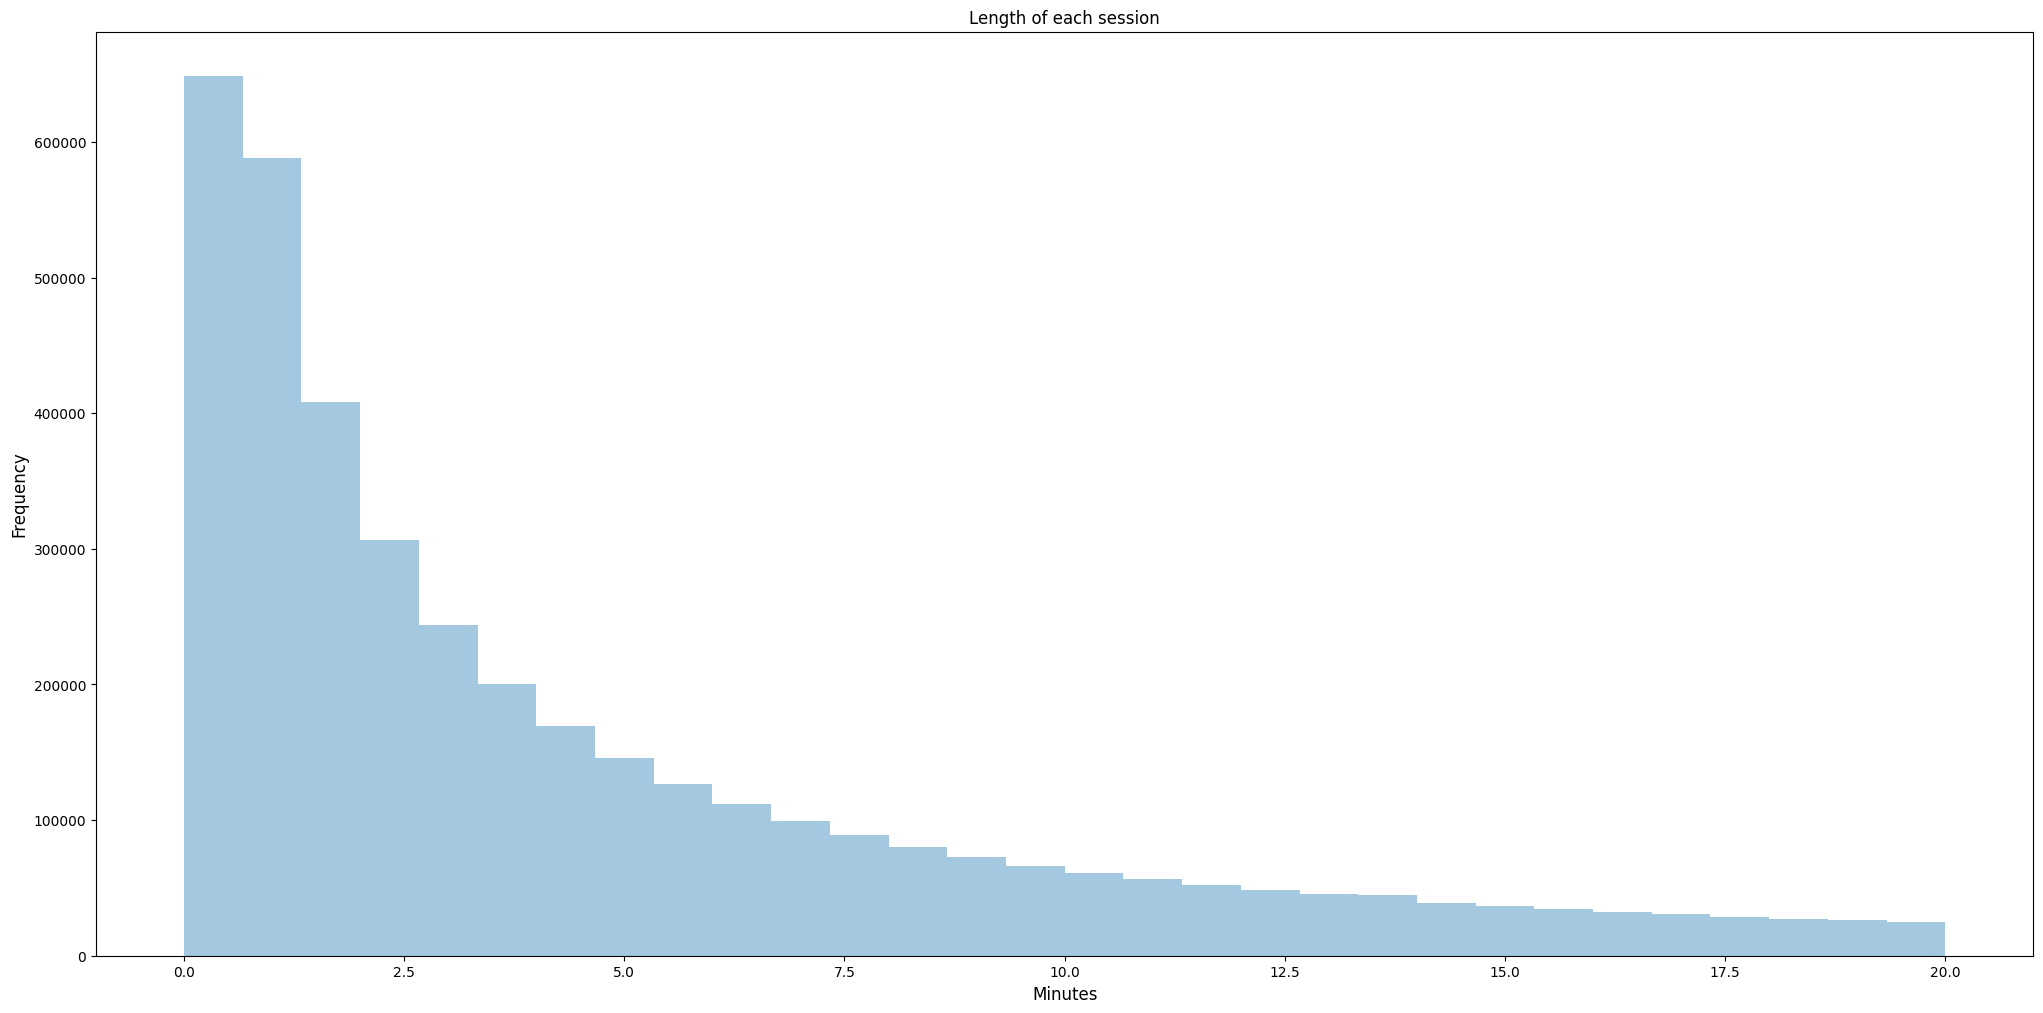

In [39]:
time_counts_picked3 = time_counts.filter((pl.col("ts") <= 20))
fig, ax = plt.subplots(figsize=(25,12))
sns.distplot(x=time_counts_picked3.select('ts'), ax=ax, bins=30, kde=False)
ax.set_title('Length of each session', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Minutes', fontsize=12)
plt.show()

In [40]:
#df_type_list = df.lazy().groupby('session').agg([pl.col("type").list()]).sort("session", reverse=False).collect()

In [41]:
df_Cl_car_or = df.lazy().groupby('session').agg([(pl.col("type") == 0).sum().alias("click_count"),(pl.col("type") == 1).sum().alias("cart_count"),(pl.col("type") == 2).sum().alias("order_count")]).sort("session", reverse=False).collect()

In [42]:
df_Cl_car_or.head()

session,click_count,cart_count,order_count
i32,u32,u32,u32
0,255,17,4
1,24,8,0
2,32,1,0
3,200,21,5
4,15,3,1


In [43]:
df_Cl_car_or.describe()

describe,session,click_count,cart_count,order_count
str,f64,f64,f64,f64
"""count""",1.2899779e7,1.2899779e7,1.2899779e7,1.2899779e7
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",6.449889e6,15.094906,1.309805,0.395274
"""std""",3.7238e6,30.071903,4.090438,1.685058
"""min""",0.0,2.0,0.0,0.0
"""max""",1.2899778e7,497.0,399.0,117.0
"""median""",6.449889e6,5.0,0.0,0.0


In [83]:
from mpl_toolkits import mplot3d
%matplotlib inline

In [231]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')

In [120]:
df_Cl_car_or.shape

(12899779, 4)

In [210]:
df_Cl_car_or.head()

session,click_count,cart_count,order_count
i32,u32,u32,u32
0,255,17,4
1,24,8,0
2,32,1,0
3,200,21,5
4,15,3,1


In [232]:
# df_Cl_car_or.get_column('click_count').to_numpy().shape

In [233]:
# df_Cl_car_or.select('click_count').to_numpy().shape

In [234]:
# (df_Cl_car_or.select('click_count').to_arrow()).shape

In [235]:
# import numpy as np
# np.linspace(0, 15, 1000).shape

In [ ]:
plt.subplots(figsize=(6, 2))
fig, ax = plt.subplots(figsize=(16, 10))

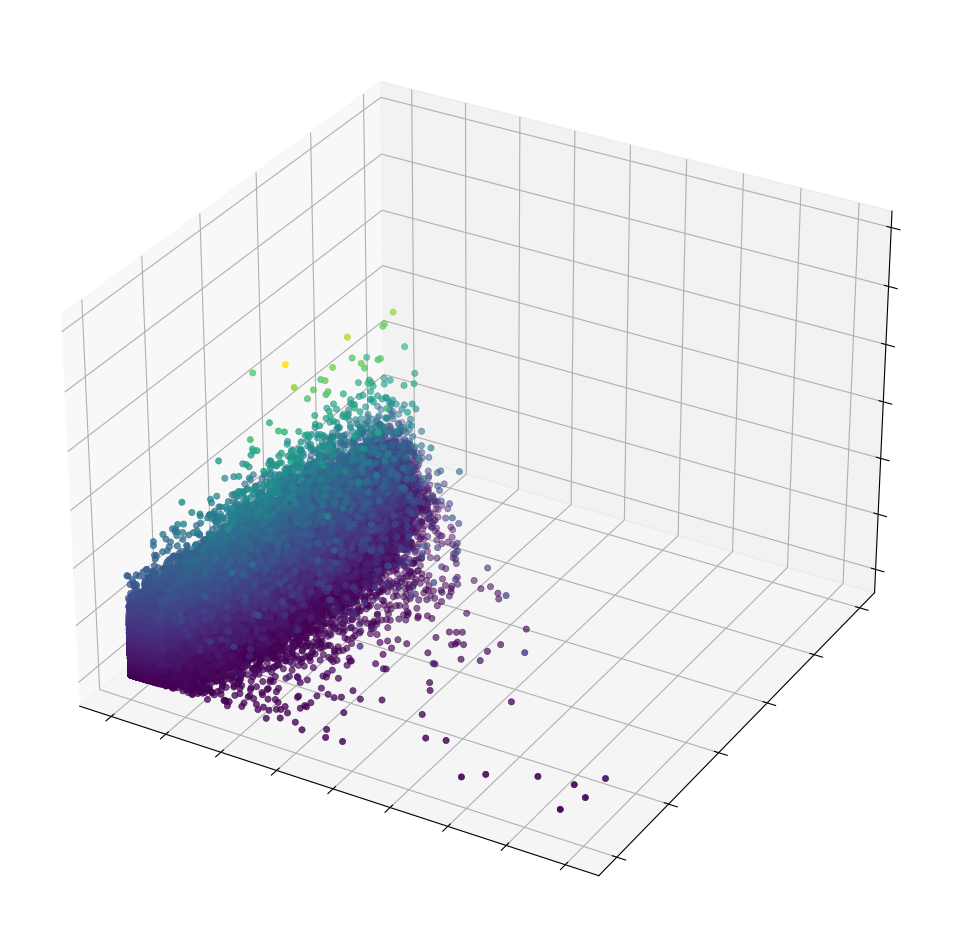

In [253]:
# Distrubution of Clicks Carts and Order
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
xline = df_Cl_car_or.get_column('cart_count').to_numpy()
yline = df_Cl_car_or.get_column('click_count').to_numpy()
zline = df_Cl_car_or.get_column('order_count').to_numpy()
ax.scatter(xline, yline,zline, c=zline, cmap='viridis', linewidth=0.5);
#ax.set_title('Distribution of different Action types', fontsize=14,color = "white")
ax.set_xlabel('Carts', fontsize=12,color = "white")
ax.set_ylabel('Clicks', fontsize=12,color = "white")
ax.set_zlabel('Orders', fontsize=12,color = "white")
ax.tick_params(labelcolor='white',labelsize= 6)
ax.spines[['right', 'bottom']].set_color('w')
plt.savefig('distribution_different_action_types_without_title.png', transparent=True)
plt.show();
#ax.plot3D(xline, yline, zline, 'gray')

In [254]:
# fig = plt.figure(figsize=(12,12))
# ax = plt.axes(projection='3d')

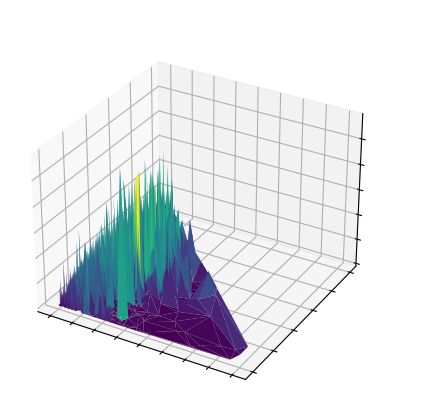

In [245]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(xline, yline, zline, cmap='viridis', edgecolor='none');
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z');
ax.set_title('Distribution of different Action Types', fontsize=14,color = "white")
ax.set_ylabel('Clicks', fontsize=12,color = "white")
ax.set_xlabel('Carts', fontsize=12,color = "white")
ax.set_zlabel('Orders', fontsize=12,color = "white")
ax.tick_params(labelcolor='white',labelsize= 6)
ax.spines[['right', 'bottom']].set_color('w')
plt.savefig('distribution_different_action_types.png', transparent=True)
plt.show();

In [44]:
# Number of Section that have no Clicks
df_Cl_car_or.filter((pl.col("click_count") == 0)).shape[0]

0

In [45]:
# Number of Section that have no carts
df_Cl_car_or.filter((pl.col("cart_count") == 0)).shape[0]

9089073

In [46]:
# Number of Section that have no Order
df_Cl_car_or.filter((pl.col("order_count") == 0)).shape[0]

11273441

In [47]:
# Number of Section that have 2 Clicks (min)
df_Cl_car_or.filter((pl.col("click_count") == 2)).shape[0]

2738195

In [48]:
# Number of Section that have 2 Clicks (min) and no carts
df_Cl_car_or.filter((pl.col("click_count") == 2) & (pl.col("cart_count") == 0)).shape[0]

2501399

In [49]:
# Number of Section that have 2 Clicks (min) and no order
df_Cl_car_or.filter((pl.col("click_count") == 2) & (pl.col("order_count") == 0)).shape[0]

2652103

In [50]:
# Number of Section that have 2 Clicks (min) and no carts and no order
df_Cl_car_or.filter((pl.col("click_count") == 2) & ((pl.col("order_count") == 0) & (pl.col("cart_count") == 0))).shape[0]

2494185

In [51]:
df_Cl_car_or.filter((pl.col("click_count") == 2) & ((pl.col("order_count") == 0) | (pl.col("cart_count") == 0))).shape[0]

2659317

**Let's Visualize number of Actions, performed in each Session**

In [52]:
from_ = [0, 1, 2]
to_ = ['click', 'cart', 'order']
df = df.with_column(
    pl.when(pl.col("type") == from_[0])
    .then(to_[0])
    .when(pl.col("type") == from_[1])
    .then(to_[1])
    .when(pl.col("type") == from_[2])
    .then(to_[2])
    .otherwise(pl.col("type")).alias("Type_cat")
)

/var/folders/rx/16pwrm4j5xxb17sc0p6wq2jm0000gn/T/ipykernel_1804/251377462.py:3: DeprecationWarning: `with_column` has been deprecated in favor of `with_columns`. This method will be removed in version 0.17.0
  df = df.with_column(


In [53]:
df.head()

session,aid,ts,type,Type_cat
i32,i32,i32,u8,str
0,1517085,1659304800,0,"""click"""
0,1563459,1659304904,0,"""click"""
0,1309446,1659367439,0,"""click"""
0,16246,1659367719,0,"""click"""
0,1781822,1659367871,0,"""click"""


In [54]:
(df.lazy().groupby('session').agg([pl.col("type").count()]).sort("session", reverse=True)).collect().describe()

describe,session,type
str,f64,f64
"""count""",1.2899779e7,1.2899779e7
"""null_count""",0.0,0.0
"""mean""",6.449889e6,16.799985
"""std""",3.7238e6,33.57738
"""min""",0.0,2.0
"""max""",1.2899778e7,500.0
"""median""",6.449889e6,6.0


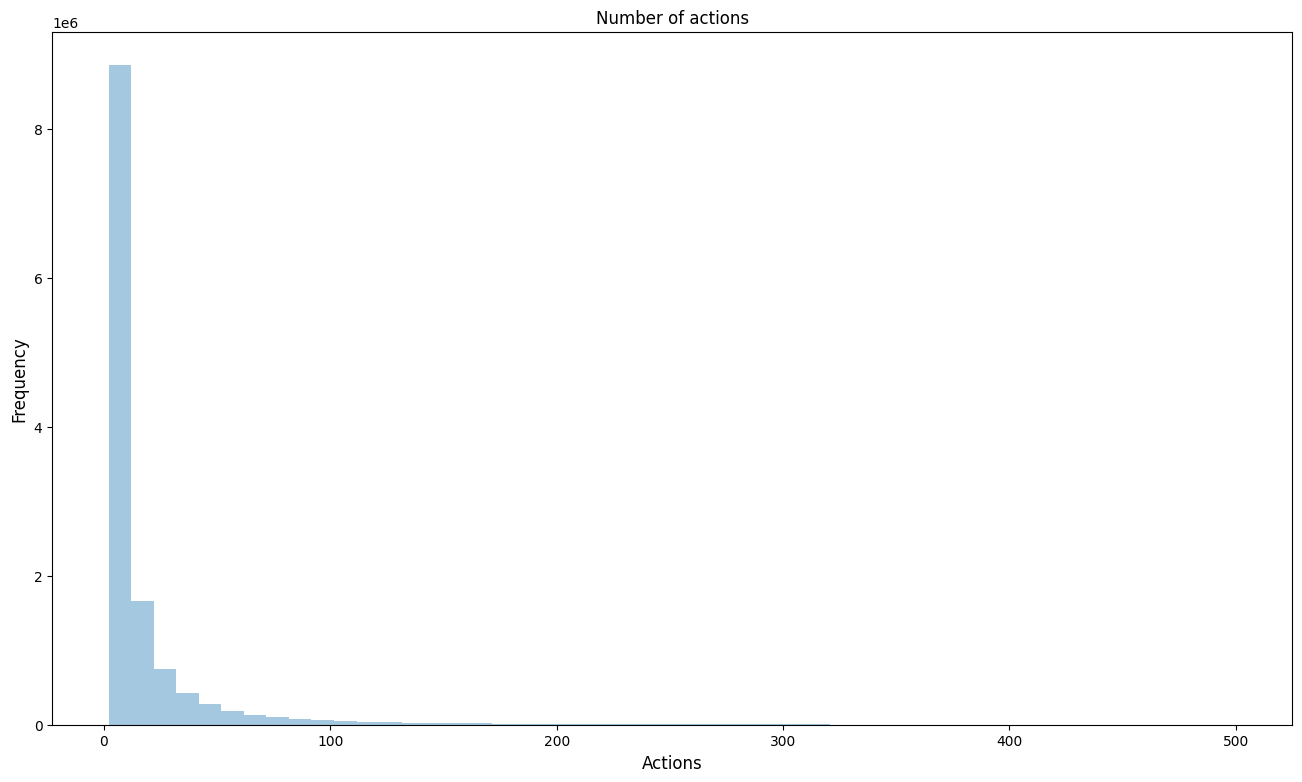

In [55]:
event_types_in_session = (df.lazy().groupby('session').agg([pl.col("type").count()])).collect()
fig, ax = plt.subplots(figsize=(16, 9))
sns.distplot(x=event_types_in_session.select('type'), ax=ax, bins=50, kde=False)
ax.set_title('Number of actions', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Actions', fontsize=12)
plt.show()

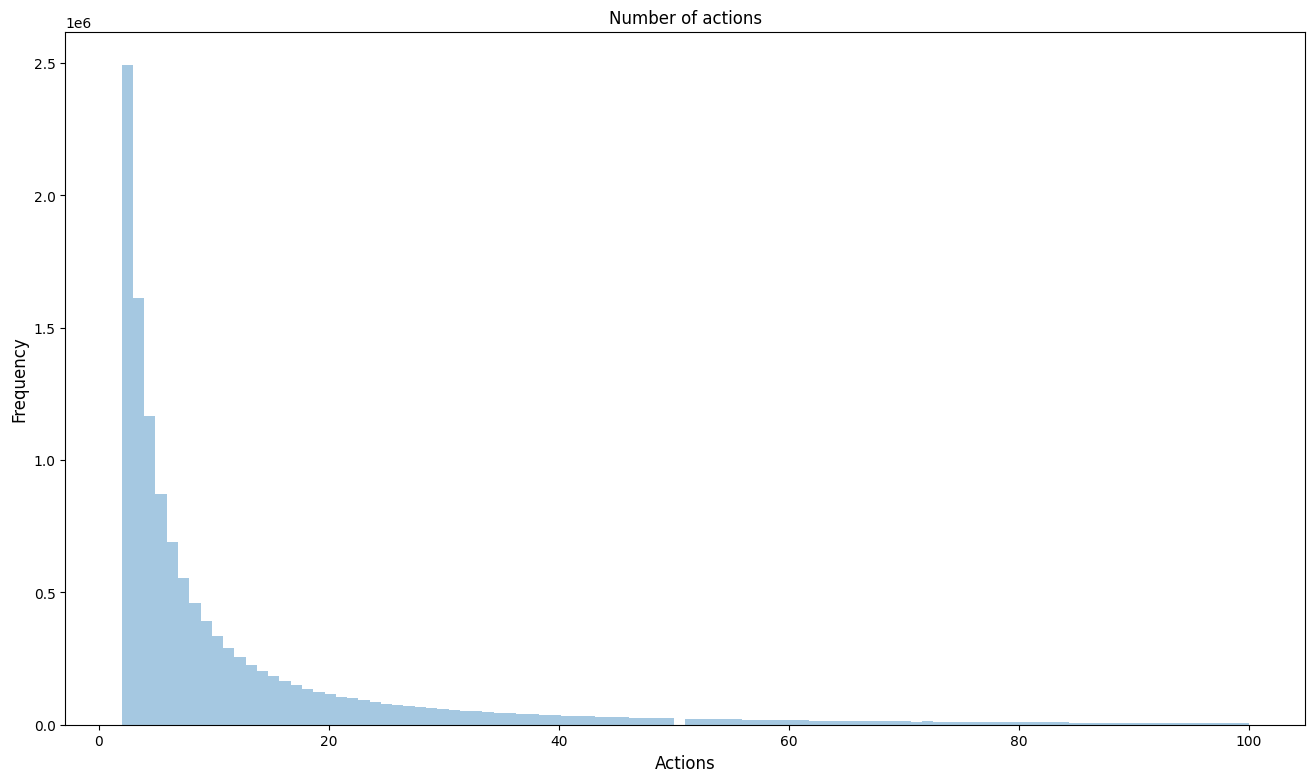

In [56]:
event_types_in_session_picked = event_types_in_session.filter((pl.col("type") <= 100))
fig, ax = plt.subplots(figsize=(16, 9))
sns.distplot(x=event_types_in_session_picked.select('type'), ax=ax, bins=100, kde=False)
ax.set_title('Number of actions', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Actions', fontsize=12)
plt.show()

In [57]:
(event_types_in_session.filter((pl.col("type") <= 25)).shape[0]/event_types_in_session.shape[0])*100

84.42017495028404

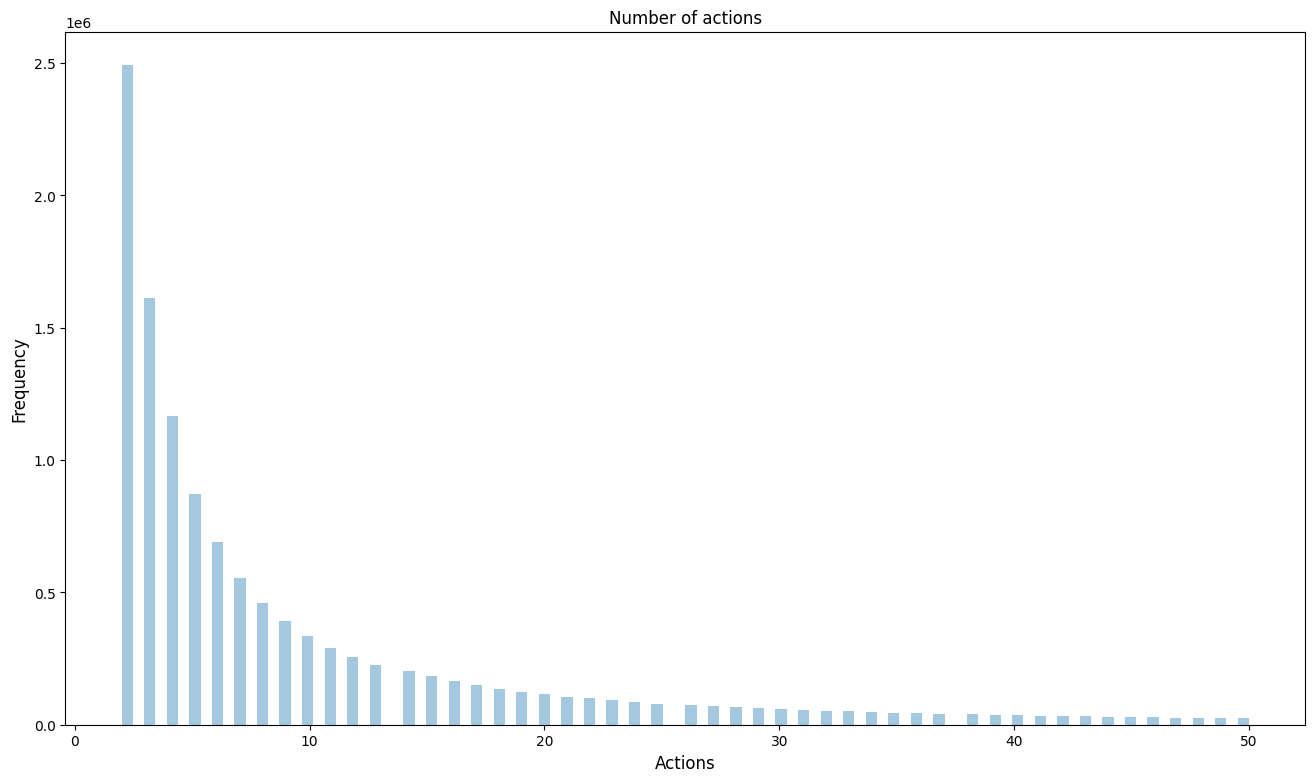

In [58]:
event_types_in_session_picked1 = event_types_in_session.filter((pl.col("type") <= 50))
fig, ax = plt.subplots(figsize=(16, 9))
sns.distplot(x=event_types_in_session_picked1.select('type'), ax=ax, bins=100, kde=False)
ax.set_title('Number of actions', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Actions', fontsize=12)
plt.show()

In [59]:
# function to verfier if there is an Order or not 
def Ordered(x):
    if "order" in x:
        return True
        
    else:
        return False 

In [60]:
df_ordered = (df.lazy().groupby('session').agg([pl.col("Type_cat").list().apply(Ordered).alias("Ordered"),pl.col("ts").apply(count_seconds).alias("Duration")]).sort("session", reverse=True)).collect()
df_ordered.head()

session,Ordered,Duration
i32,bool,f64
12899778,false,0.183333
12899777,false,0.166667
12899776,false,0.25
12899775,false,0.333333
12899774,false,0.133333


In [61]:
df_ordered.tail()

session,Ordered,Duration
i32,bool,f64
4,true,38031.35
3,true,30081.1
2,false,40156.916667
1,false,40167.566667
0,true,39669.716667


In [62]:
# Some Infos about Section that has Order
df_ordered.filter((pl.col("Ordered") == 'true')).select('Duration').describe()

describe,Duration
str,f64
"""count""",1.626338e6
"""null_count""",0.0
"""mean""",15952.17137
"""std""",14269.444509
"""min""",0.1
"""max""",40319.85
"""median""",13853.341667


In [63]:
# Some Infos about Section that has no Order
df_ordered.filter((pl.col("Ordered") == 'false')).select('Duration').describe()

describe,Duration
str,f64
"""count""",1.1273441e7
"""null_count""",0.0
"""mean""",8999.027472
"""std""",11550.955856
"""min""",0.0
"""max""",40319.483333
"""median""",2276.1


In [64]:
#(df.lazy().groupby('session').agg([pl.col("Type_str").apply(lambda x: x['Type_str'].eq('order').any())]).sort("session", reverse=True)).collect()

In [65]:
#(df.lazy().groupby('session').agg([pl.col("Type_cat").list().apply(lambda x: True if "order" in x else False),pl.col("ts").apply(count_seconds)]).sort("session", reverse=True)).collect()

In [66]:
#df.filter((pl.col("session") == 0)).select("ts").max()-df.filter((pl.col("session") == 0)).select("ts").min()

**Analyzing the Product-ids**

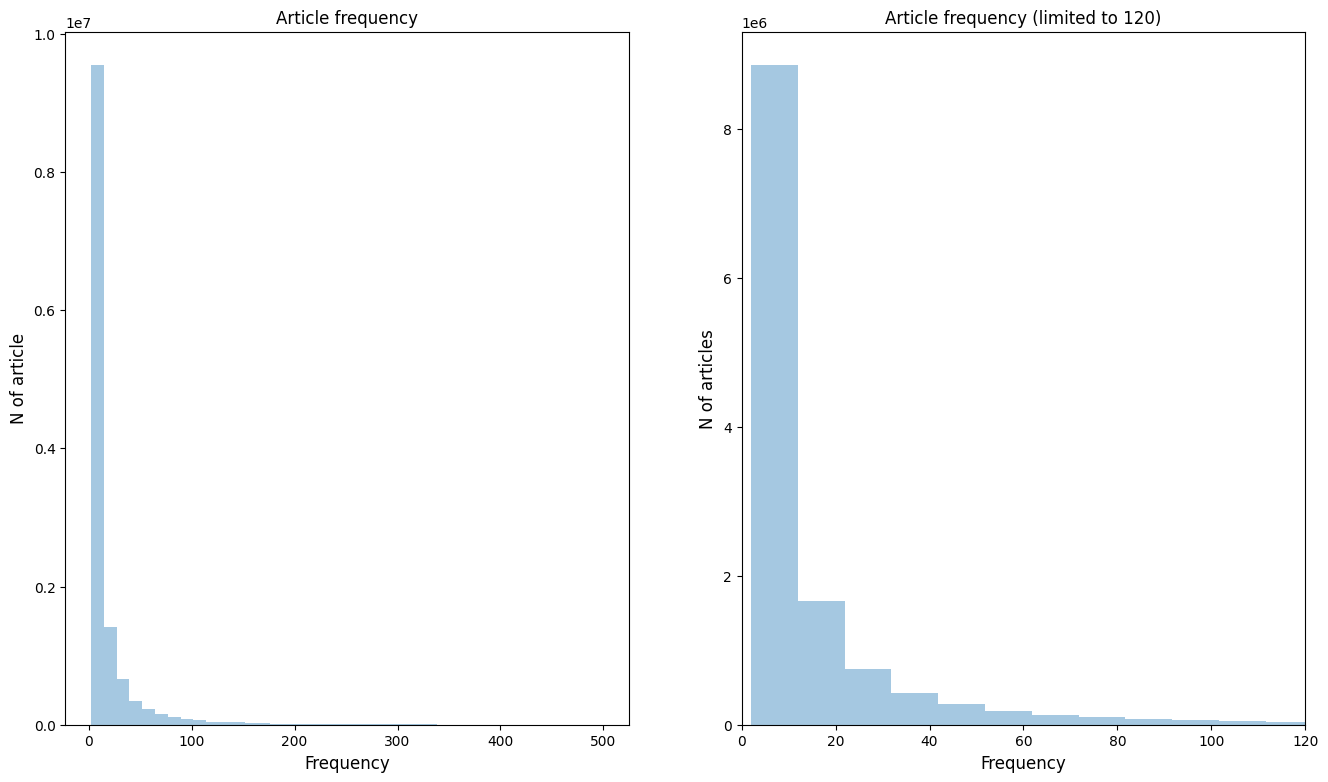

In [67]:
events_in_session = df.lazy().groupby('session').agg([pl.col("aid").count()]).sort("aid", reverse=True).collect()

fig, ax = plt.subplots(ncols=2, figsize=(16, 9))
sns.distplot(x=events_in_session.select('aid'), ax=ax[0], bins=40, kde=False)
ax[0].set_title('Article frequency', fontsize=12)
ax[0].set_ylabel('N of article', fontsize=12)
ax[0].set_xlabel('Frequency', fontsize=12)

sns.distplot(x=events_in_session.select('aid'), ax=ax[1], bins=50, kde=False)
ax[1].set_title('Article frequency (limited to 120)', fontsize=12)
ax[1].set_ylabel('N of articles', fontsize=12)
ax[1].set_xlabel('Frequency', fontsize=12)
ax[1].set_xlim(0, 120)

plt.show()